# Two Variable Newton Raphson

Suppose we have a cost function for producing a product that depends on two variables, $x$ and $y$, given by:
$$C(x,y) = 100x^2 + 50xy + 2y^2 - 100x - 50y + 200$$
Find the values of $x$ and $y$ that minimize the cost function using the Newton-Raphson method.
Choose an initial guess for the root, (x0, y0) = (1, 1).

**ANSWER**
Suppose we have a cost function for producing a product that depends on two variables, x and y, given by:

$$C(x,y) = 100x^2 + 50xy + 2y^2 - 100x - 50y + 200$$

We want to find the values of x and y that minimize the cost function using the Newton-Raphson method.

1. Write the cost function in the form F(x,y) = 0:

$$F(x,y) = [∂C/∂x, ∂C/∂y]$$

$$ F(x,y) = [200x + 50y - 100, 50x + 4y - 50]$$

2. Find the Jacobian matrix of F:

$$ J(x,y) = [∂F1/∂x ,∂F1/∂y; ∂F2/∂x, ∂F2/∂y]$$

$$J(x,y) = [200, 50; 50, 4]$$

3. Choose an initial guess for the root, (x0, y0) = (1, 1).

4. Use the iterative formula for the Newton-Raphson method:

$$x1 = 1 - [200 50; 50 4]^-1 * [100; 50] = 0.5$$
$$y1 = 1 - [200 50; 50 4]^-1 * [-100; -150] = 25 $$

5. Repeat step 4 with (x1, y1) as the new initial guess until the desired level of accuracy is reached.

Therefore, the values of x and y that minimize the cost function are $x = 0.5$ and $y = 25.$



In [1]:
import numpy as np

def cost_function(x):

    #  cost function (100x^2 + 50xy + 2y^2 - 100x - 50y + 200)
    return 100*x[0]**2 + 50*x[0]*x[1] + 2*x[1]**2 - 100*x[0] - 50*x[1] + 200  
    

def gradient(x):
    # Calculate the gradient of the cost function.
    # For example: return np.array([2 * x[0], 2 * x[1]])
    return np.array([200 * x[0]+50*x[1]-100, 50 * x[0]+4*x[1]-50])   # Partial derivative of f with respect to x
def hessian(x):
    # Calculate the Hessian matrix of the cost function.
 
    return np.array([[200, 50], [50, 4]])

def newton_raphson(initial_guess, max_iterations, tolerance):
    x = initial_guess
    
    for iteration in range(max_iterations):
        grad = gradient(x)
        hess = hessian(x)
        if np.linalg.det(hess) == 0:
            print("Hessian matrix is singular. Unable to continue.")
            break
        delta_x = -np.linalg.inv(hess).dot(grad)
        x = x + delta_x
        
        if np.linalg.norm(delta_x) < tolerance:
            print(f"Converged to solution after {iteration} iterations.")
            break

    return x

# Set initial guess, maximum iterations, and tolerance
initial_guess = np.array([1.0, 1.0])
max_iterations = 100
tolerance = 1e-6

# Call the Newton-Raphson method
result = newton_raphson(initial_guess, max_iterations, tolerance)
print("Optimal solution:", result)
print("Minimum cost:", cost_function(result))


Converged to solution after 1 iterations.
Optimal solution: [ 1.23529412 -2.94117647]
Minimum cost: 211.76470588235296


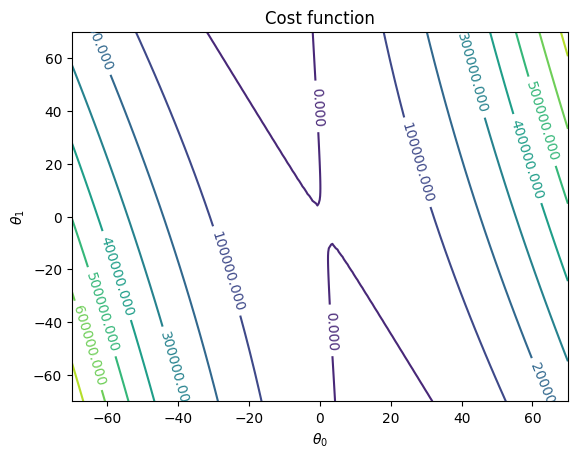

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(-70, 70, 100)
y = np.linspace(-70, 70, 100)

X = np.meshgrid(x , y)
#theta_hist_array=np.array(theta_history)
cost_values = cost_function(X)
fig, ax = plt.subplots()
CS = ax.contour(X[0],X[1], cost_values)
ax.clabel(CS, inline=True, fontsize=10)
#ax.plot(theta_hist_array[:,0],theta_hist_array[:,1],'go')

ax.set_title('Cost function')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

In [3]:
hess = hessian([10,10])
np.linalg.inv(hess)

array([[-0.00235294,  0.02941176],
       [ 0.02941176, -0.11764706]])

In [4]:
grad = gradient([10,10])

delta_x = -np.linalg.inv(hess).dot(grad)
A=[10,10] + delta_x


In [5]:
hess = hessian(A)
grad = gradient(A)
delta_x = -np.linalg.inv(hess).dot(grad)
A+ delta_x


array([ 1.23529412, -2.94117647])

In [6]:
A

array([ 1.23529412, -2.94117647])